# CIS 5450 Homework 2: SQL
## Due: Thursday, October 13rd 2022, 10pm EST 
### Worth 100 points in total

Welcome to Homework 2! By now, you should be familiar with the world of data science and the Pandas library. This assignment focuses on helping you get to grips with a new tool: SQL.

Through this homework, we will be working with SQL (specifically **pandasql**) by exploring a Spotify dataset containing song reviews and statistics. We will also conduct some text analysis of song reviews.

 <!-- We will finish off the homework with some text analysis. -->

We are introducing a lot of new things in this homework, and this is often where students start to get lost. Thus, we **strongly** encourage you to review the slides/material as you work through this assignment. 

**Before you begin:**
- Be sure to click "Copy to Drive" to make sure you're working on your own personal version of the homework
- Check the pinned FAQ post on Ed for updates! If you have been stuck, chances are other students have also faced similar problems.

## Part 0: Libraries and Set Up Jargon (The usual wall of imports)

In [163]:
!pip install -i https://test.pypi.org/simple/ penn-grader==0.5.0
!pip install pandasql

Looking in indexes: https://test.pypi.org/simple/, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [164]:
from penngrader.grader import *
import pandas as pd
import datetime as dt
import pandasql as ps #SQL on Pandas Dataframe
import nltk
import numpy as np
nltk.download('punkt')

from wordcloud import WordCloud
import matplotlib.pyplot as plt 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [165]:
# Three datasets we're using
! wget -nc https://storage.googleapis.com/penn-cis5450/spotify_features.csv
! wget -nc https://storage.googleapis.com/penn-cis5450/spotify_songs.csv
! wget -nc https://storage.googleapis.com/penn-cis5450/spotify_rankings.csv

File ‘spotify_features.csv’ already there; not retrieving.

File ‘spotify_songs.csv’ already there; not retrieving.

File ‘spotify_rankings.csv’ already there; not retrieving.



In [166]:
print(pd.__version__ )

1.3.5


### PennGrader Setup

In [167]:
# PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO 
# TO ASSIGN POINTS TO YOU IN OUR BACKEND
STUDENT_ID = 20723731 # YOUR PENN-ID GOES HERE AS AN INTEGER #

# You should also update this to a unique "secret" just for this homework, to
# authenticate this is YOUR submission
SECRET = STUDENT_ID

In [168]:
%%writefile config.yaml

grader_api_url: 'https://wyv616tp17.execute-api.us-east-1.amazonaws.com/default/Grader'
grader_api_key: 'Kd32fl3g3p917iM0zwjiO23Bitj4PO9ga4LektOa'

Overwriting config.yaml


In [169]:
grader = PennGrader('config.yaml', 'CIS_5450_Fall22_HW2', STUDENT_ID, SECRET)

PennGrader initialized with Student ID: 20723731

Make sure this correct or we will not be able to store your grade




# Music for everyone!

<br>
<center><img src = "https://upload.wikimedia.org/wikipedia/commons/3/33/Spotify_logo13.png" width= "500" align ="center"/></center>
<br>

We'll be working with a dataset containing Top Tracks on Spotify in 2017, along with their reviews and rankings.

In this homework, we'll be exploring the following attributes of the song data:

*   Song-specific metadata (eg. artist name) 

*   The songs' rankings based on date and listener location

*   Acoustic / musical properties of the song, eg. danceability


We'll be loading this data into various dataframes and querying them. We will primarily be using PandaSQL for these tasks. However, for some of the initial questions, we'll ask you to perform the same operations in Pandas. The purpose of conducting the same tasks in both Pandas and PandaSQL is to help you become more familiar with the similarites and differences of these two tools.

## Part 1: Load & Process our Datasets [9 points total]

Before we get into the data, we first need to load and clean our datasets. 

# Metadata
You'll be working with three CSV files:
- `spotify_features.csv`
- `songs_features.csv`
- `spotify_rankings.csv`

The file `spotify_features.csv` contains musical / acoustic data for each song, obtained via the Spotify API.

The file `songs_features.csv` includes the names, artists, Spotify URLs of the Top Songs of 2017. 

Each row in the file `spotify_rankings.csv` contains a song's ranking on a specific day in a particular region, where regions are sorted alphabetically.

For example, the first 200 rows of `spotify_rankings.csv` represent the ranks of various songs on 1st of January in Argentina. The next 200 rows contain the  rankings of songs during the 2nd of January in Argentina. 

Note that the Spotify dataset may containing missing data, so don't rely on the interval between successive dates as 200 rows. 

Instead, it would be preferable to read all the data and then filter by region & date. This way, you can be sure that you have the required data.


**TODO**:
* Load `spotify_songs.csv` and save the data to a dataframe called `songs_df`.
* Load `spotify_rankings.csv` and save the data to a dataframe called `rankings_df`.
* Load `spotify_features.csv` and save the data to a dataframe called `features_df` without the index column being included.

**Note**: If you see a column called `Unnamed: 0` when loading the data,be sure to drop this column while loading the dataset. This is necessary for one to receive full credit in all the following parts of this homework.

In [170]:
# TODO: Import the datasets to pandas dataframes -- make sure the dataframes are named correctly! 
songs_df=pd.read_csv("spotify_songs.csv")
rankings_df=pd.read_csv("spotify_rankings.csv")
features_df=pd.read_csv("spotify_features.csv")

In [171]:
# view songs_df to make sure the import was successful
songs_df.head()

,id,name,artists,duration_ms,time_signature,reviews
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,233713,4,vocal has a nice warm quality.
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,228827,4,Very European feeling. I like that the singer ...
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,228200,4,Unique and quirky. Arrangement was good and ni...
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,247160,4,Tastefully put together song. Good instrumenta...
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,288600,4,Your voice is awesome


In [172]:
# view rankings_df to make sure the import was successful
rankings_df.head()

,Unnamed: 0,Position,Track Name,Artist,Streams,URL,Date,Region
0,0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec


In [173]:
# view features_df to make sure the import was successful
features_df.head()

,Unnamed: 0,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,7qiZfU4dY1lWllzX7mPBI,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977
1,1,5CtI0qwDJkDQGwXD1H1cL,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931
2,2,4aWmUDTfIPGksMNLV2rQP,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833
3,3,6RUKPb4LETWmmr3iAEQkt,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019
4,4,3DXncPQOG4VBw3QHh3S81,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924


### 1.1 Data Preprocessing
We are now going to clean our dataframes `songs_df` and `rankings_df` by performing the following tasks:       
1) fixing columns        
2) changing datatypes             
3) handling nulls.

First, let us view the first few rows of `songs_df`. You may also call `.info()` and check the cardinality of each column to view the specifics of the dataframe. This is a good first step to take during Exploratory Data Analysis (EDA).

In [174]:
# view info information regarding movies_df
songs_df.info()
rankings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              100 non-null    object
 1   name            100 non-null    object
 2   artists         100 non-null    object
 3   duration_ms     100 non-null    int64 
 4   time_signature  100 non-null    int64 
 5   reviews         100 non-null    object
dtypes: int64(2), object(4)
memory usage: 4.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3441197 entries, 0 to 3441196
Data columns (total 8 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   Position    int64 
 2   Track Name  object
 3   Artist      object
 4   Streams     int64 
 5   URL         object
 6   Date        object
 7   Region      object
dtypes: int64(3), object(5)
memory usage: 210.0+ MB


#### 1.1.1 Cleaning `songs_df`

`.info()` gives us meaningful information regarding columns, their types, and the amount of nulls. With this information, we can now clean our dataframe. 

**TODO**:
* Drop the column `time_signature`.

In [175]:
# TODO: clean songs_df
songs_df=songs_df.drop(columns=["time_signature"])

In [176]:
# 3 points
grader.grade(test_case_id = 'test_cleaning_songs', answer = songs_df.head())

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 1.1.2 Processing Rankings

`rankings_df` contains a `URL` column that represents the URL of the Spotify track. This URL contains the track ID. We would like to extract the ID corresponding to each song. 

To maintain consistency, begin by sorting this dataframe according to `Date` in ascending order. 

**TODO**:
- Sort the `Date` column in ascending order
- Split the strings in the `URL` column to extract the ID for each song, and save this as a new column called `ID` in `rankings_df`
- Drop the `URL` column

**Example**:
>URL | ID
>--- | ---
> https://open.spotify.com/track/3AEZUABDXNtecAOSC1qTf | 3AEZUABDXNtecAOSC1qTf

After performing these steps, `rankings_df` should have the following schema:
**Final Schema**:
>Position | Track Name | Artist | Streams | Date | Region | ID
>--- | --- | --- |--- |--- |--- |--- |

**Hint**: Note the delimiter within the URL and consult the documentation for the `.split()` function

In [177]:
# TODO: extract ID and drop URL
df=rankings_df
df=df.sort_values(by=["Date"],ascending=True)
df["ID"]=df["URL"].apply(lambda x:str(x).split("/")[-1])
df=df.drop(columns=["URL"])
df.head()
rankings_df=df
rankings_df.head()
#rankings_df.drop(columns=["URL"])


,Unnamed: 0,Position,Track Name,Artist,Streams,Date,Region,ID
0,0,1,Reggaetón Lento (Bailemos),CNCO,19272,2017-01-01,ec,3AEZUABDXNtecAOSC1qTf
2658317,2658317,118,Steady 1234 (feat. Jasmine Thompson & Skizzy M...,Vice,15142,2017-01-01,nl,40UroIGvsMPLPBYwH8rMN
2658316,2658316,117,Dynamite (feat. Pretty Sister),Nause,15152,2017-01-01,nl,2Ae5awwKvQpTBKQHr1TYC
2658315,2658315,116,Hello,Adele,15170,2017-01-01,nl,4sPmO7WMQUAf45kwMOtON
2658314,2658314,115,One Night Stand,B-Brave,15510,2017-01-01,nl,2no9x9FRytP9PnB3CQPYS


In [178]:
# 4 points
grader.grade(test_case_id = 'test_rankings_processing', answer = rankings_df.head())

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 1.1.3 Cleaning `rankings_df`

Now let's clean `rankings_df` and make it usable.

In [179]:
# Examine rankings_df using the .info() function


**TODO**:
* Drop all rows that have a null value in `rankings_df`
* Convert column `Date` into type `datetime64[ns]`.


In [180]:
#TODO: 
rankings_df=rankings_df.dropna()
rankings_df=rankings_df.astype({"Date":"datetime64[ns]"})
rankings_df.head()

,Unnamed: 0,Position,Track Name,Artist,Streams,Date,Region,ID
0,0,1,Reggaetón Lento (Bailemos),CNCO,19272,2017-01-01,ec,3AEZUABDXNtecAOSC1qTf
2658317,2658317,118,Steady 1234 (feat. Jasmine Thompson & Skizzy M...,Vice,15142,2017-01-01,nl,40UroIGvsMPLPBYwH8rMN
2658316,2658316,117,Dynamite (feat. Pretty Sister),Nause,15152,2017-01-01,nl,2Ae5awwKvQpTBKQHr1TYC
2658315,2658315,116,Hello,Adele,15170,2017-01-01,nl,4sPmO7WMQUAf45kwMOtON
2658314,2658314,115,One Night Stand,B-Brave,15510,2017-01-01,nl,2no9x9FRytP9PnB3CQPYS


In [181]:
# 2 points
grader.grade(test_case_id = 'test_cleaning_rankings', answer = [len(rankings_df),rankings_df.head()])

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 1.2 Your Sandbox 

.info() is just one of many basic tools that you can use for Exploratory Data Analysis (EDA). Instead of throwing you straight into the deep end, we wanted to give you a chance to take some time and explore the data on your own. **This section is not graded**, so for the speedrunners out there feel free to just skip this section (1.2), but we wanted to at least give you a small space to utilize your EDA toolkit to familiarize yourself with all the data you just downloaded.

Some suggestions to get you started:
- `df.head()`
- `df.describe()`
- `Series.unique()`

In [182]:
rankings_df.describe()

,Unnamed: 0,Position,Streams
count,3.440540e+06,3.440540e+06,3.440540e+06
mean,1.720591e+06,9.465220e+01,5.188452e+04
std,9.933887e+05,5.739412e+01,2.017733e+05
min,0.000000e+00,1.000000e+00,1.001000e+03
25%,8.602838e+05,4.500000e+01,3.321000e+03
50%,1.720594e+06,9.200000e+01,9.226000e+03
75%,2.580891e+06,1.430000e+02,2.965600e+04
max,3.441196e+06,2.000000e+02,1.138152e+07


In [183]:
features_df.describe()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,0.69682,0.660690,5.570000,-5.652650,0.580000,0.103969,0.166306,0.004796,0.150607,0.517049,119.202460
std,29.011492,0.12508,0.139207,3.731534,1.802067,0.496045,0.095115,0.166730,0.026038,0.079011,0.216436,27.952928
min,0.000000,0.25800,0.346000,0.000000,-11.462000,0.000000,0.023200,0.000259,0.000000,0.042400,0.086200,75.016000
25%,24.750000,0.63500,0.556500,2.000000,-6.594500,0.000000,0.043125,0.039100,0.000000,0.098275,0.375500,99.911750
50%,49.500000,0.71400,0.667500,6.000000,-5.437000,1.000000,0.062650,0.106500,0.000000,0.125000,0.502500,112.468000
75%,74.250000,0.77025,0.787500,9.000000,-4.326750,1.000000,0.123000,0.231250,0.000013,0.179250,0.679000,137.166000
max,99.000000,0.92700,0.932000,11.000000,-2.396000,1.000000,0.431000,0.695000,0.210000,0.440000,0.966000,199.864000


In [184]:
songs_df.describe()

,duration_ms
count,100.00000
mean,218387.28000
std,32851.07772
min,165387.00000
25%,198490.50000
50%,214106.00000
75%,230543.00000
max,343150.00000


In [185]:
rankings_df.head()

,Unnamed: 0,Position,Track Name,Artist,Streams,Date,Region,ID
0,0,1,Reggaetón Lento (Bailemos),CNCO,19272,2017-01-01,ec,3AEZUABDXNtecAOSC1qTf
2658317,2658317,118,Steady 1234 (feat. Jasmine Thompson & Skizzy M...,Vice,15142,2017-01-01,nl,40UroIGvsMPLPBYwH8rMN
2658316,2658316,117,Dynamite (feat. Pretty Sister),Nause,15152,2017-01-01,nl,2Ae5awwKvQpTBKQHr1TYC
2658315,2658315,116,Hello,Adele,15170,2017-01-01,nl,4sPmO7WMQUAf45kwMOtON
2658314,2658314,115,One Night Stand,B-Brave,15510,2017-01-01,nl,2no9x9FRytP9PnB3CQPYS


In [186]:
features_df.head()

,Unnamed: 0,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,7qiZfU4dY1lWllzX7mPBI,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977
1,1,5CtI0qwDJkDQGwXD1H1cL,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931
2,2,4aWmUDTfIPGksMNLV2rQP,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833
3,3,6RUKPb4LETWmmr3iAEQkt,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019
4,4,3DXncPQOG4VBw3QHh3S81,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924


In [187]:
# Your EDA here! Feel free to add more cells
songs_df.head()

,id,name,artists,duration_ms,reviews
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,233713,vocal has a nice warm quality.
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,228827,Very European feeling. I like that the singer ...
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,228200,Unique and quirky. Arrangement was good and ni...
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,247160,Tastefully put together song. Good instrumenta...
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,288600,Your voice is awesome


## Part 2: Exploring the Data with PandasSQL (and Pandas) [62 points total]

Now that you're more familiar with the dataset, we'll now introduce you to SQL language. Specifically, we'll be using **pandasql**: a library that allows users to query Pandas DataFrames using SQL statements.

The typical flow of using pandasql (shortened to **ps**) is as follows:
1. Write a SQL query in the form of a string (Tip: use triple quotes """x""" to write multi-line strings)
2. Run the query using **ps.sqldf(your_query, locals())**

PandaSQL is convenient as it allows you to reference the dataframes that are currently defined in your notebook, so you will be able to fully utilize the dataframes `songs_df`, `rankings_df` and `features_df` that you have created above!

Given that SQL is a brand new language, we wanted to give you a chance to directly compare the similarities &differences of Pandas and SQL. 
Thus, for each of the simpler queries, we ask that you **perform the tasks in each question twice: once with Pandas and once with PandaSQL**. 

Each answer (unless specified otherwise) will thus require two dataframes, one dataframe whose name is prefixed with `pd_`, and another dataframe whose name is prefixed with `sql_`. You will submit these two dataframes seperately to the autograder. **We will be reviewing your code to make sure your code for each dataframe is written in the correct language.**


###2.1 Bruno Mars songs


#### 2.1.1 How many Bruno Mars' songs were popular in 2017?

Note: Only Pandas is required for this question.
The dataframe `songs_df` contains all top songs in 2017. We want to know whether Bruno Mars was a part of it (he obviously was) - but which of his songs made it to the top?

**TODO:** Using **pandas**, filter out the songs and reviews from `songs_df` that were by `Bruno Mars`. Then, save this data to a DataFrame called `bruno_df` that has the following schema:

>name | reviews
>--- | ---



In [188]:
# TODO: Use pandas to obtain songs by `Bruno Mars`
bruno_df=songs_df[songs_df["artists"]=="Bruno Mars"]
bruno_df=bruno_df[["name","reviews"]]
bruno_df

,name,reviews
8,That's What I Like,You have a really cool voice! I like the way y...
59,24K Magic,Lyrics are very good. Backing sounds nice.


In [189]:
# 2 points
grader.grade(test_case_id = 'test_bruno', answer = bruno_df)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 2.1.2 How many of Bruno Mars' songs were deemed "good"?
We now want to see which of these songs contained the word "good" in the `reviews` column.

**TODO:** Using **pandasql**, update `bruno_df` so that it only contains songs that have the word 'good' in the `reviews` column.

In [190]:
# TODO: Use pandasql to obtain only "good" songs of bruno mars
good_song_query = """SELECT * 
FROM bruno_df 
WHERE reviews LIKE "%good%" """

bruno_df = ps.sqldf(good_song_query, locals())
bruno_df

,name,reviews
0,24K Magic,Lyrics are very good. Backing sounds nice.


In [191]:
# 2 points
grader.grade(test_case_id = 'test_good_songs_df', answer = bruno_df)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


###2.2 Finding the hit songs



#### 2.2.1 Extract the total no. of streams
We now want to see what songs formed the top 75% of the year 2017 from `rankings_df`. We can measure the popularity of the songs using the total number of streams the song received.

**TODO**: 
* Find the total number of streams per song and save it into a dataframe called `streams_df`
* Understand the quartile ranges in `streams_df`

**Hint**: you may find it helpful to look up `.describe()` to understand quartiles. It would be helpful to save the necessary quartile value to use in the querying section that follows.




In [192]:
# TODO: Using pandas extract the total number of streams per song from rankings_df
df=rankings_df
streams_df=df.groupby("Track Name")["Streams"].sum()
streams_df

Track Name
"All That Is or Ever Was or Ever Will Be"       7311
"Read All About It, Pt. III"                   57025
#99                                            31826
#Askip                                        296862
#Biziz - feat. Lil Bege                       403591
                                              ...   
전야 前夜 The Eve                                 976392
지나갈 테니 Been Through                            87456
쩔어 DOPE                                       209493
피 땀 눈물                                         68673
피카부 Peek-A-Boo                               2078217
Name: Streams, Length: 18597, dtype: int64

In [193]:
# 2 points
grader.grade(test_case_id = 'test_pd_describe', answer = len(streams_df))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 2.2.2 Top 75% of streams

Now that we've seen the distribution of the streams, we'd like to extract songs with streams within the top 75%, i.e 75% or more streams. For this part, use the quartile values you got via the `.describe()` function.

**TODO**: Using **pandas**, 
Filter out songs from `streams_df` whose stream count is in the top 75%, then save this data as the Pandas dataframe `pd_top_streams`.

In [194]:
# TODO: Using pandas extract the top 75% based on number of streams
streams_df=streams_df.reset_index()
streams_df.quantile(0.25)
pd_top_streams=streams_df[streams_df["Streams"]>21334]
pd_top_streams

,Track Name,Streams
1,"""Read All About It, Pt. III""",57025
2,#99,31826
3,#Askip,296862
4,#Biziz - feat. Lil Bege,403591
5,#CTZK,669563
...,...,...
18592,전야 前夜 The Eve,976392
18593,지나갈 테니 Been Through,87456
18594,쩔어 DOPE,209493
18595,피 땀 눈물,68673


In [195]:
# 2 points
grader.grade(test_case_id = 'test_pd_songs', answer = pd_top_streams)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Repeat this process using **pandasql**, and save the data in the variable `sql_top_streams`

In [196]:
# TODO: Using pandasql extract the top 75% based on number of streams
top_query = """
SELECT *
FROM streams_df
WHERE "Streams">21334
"""

sql_top_streams = ps.sqldf(top_query, locals())
sql_top_streams

,Track Name,Streams
0,"""Read All About It, Pt. III""",57025
1,#99,31826
2,#Askip,296862
3,#Biziz - feat. Lil Bege,403591
4,#CTZK,669563
...,...,...
13941,전야 前夜 The Eve,976392
13942,지나갈 테니 Been Through,87456
13943,쩔어 DOPE,209493
13944,피 땀 눈물,68673


In [197]:
# 2 points
grader.grade(test_case_id = 'test_sql_songs', answer = sql_top_streams)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.3 Duration of songs


Now that we know which songs are hits, we'd like to listen to songs that are not too short nor too long.

**TODO**: Using **pandas**, 
Filter out songs from `songs_df` whose duration is between 3 and 5 minutes.

- Create a new column in `songs_df` called "duration_min" that converts the duration in "duration_ms" from milliseconds to minutes
- Extract only songs whose duration is at least 3 minutes and at most 5 minutes. Then, save the output to `ideal_songs_df`.


In [198]:
songs_df["duration_min"]=songs_df["duration_ms"]/60000
ideal_songs_df=songs_df[(songs_df["duration_min"]>=3)&(songs_df["duration_min"]<=5)]
ideal_songs_df

,id,name,artists,duration_ms,reviews,duration_min
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,233713,vocal has a nice warm quality.,3.895217
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,228827,Very European feeling. I like that the singer ...,3.813783
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,228200,Unique and quirky. Arrangement was good and ni...,3.803333
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,247160,Tastefully put together song. Good instrumenta...,4.119333
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,288600,Your voice is awesome,4.810000
...,...,...,...,...,...,...
94,2fQrGHiQOvpL9UgPvtYy6,Bank Account,21 Savage,220307,"Good vocal, Good arrangement, Good subject mat...",3.671783
95,1PSBzsahR2AKwLJgx8ehB,Bad Things (with Camila Cabello),Machine Gun Kelly,239293,Good strong voice,3.988217
96,0QsvXIfqM0zZoerQfsI9l,Don't Let Me Down,The Chainsmokers,208053,good movie sound track,3.467550
98,7i2DJ88J7jQ8K7zqFX2fW,Now Or Never,Halsey,214802,Good lyrics...,3.580033


In [199]:
# 2 points
grader.grade(test_case_id = 'test_song_duration', answer = ideal_songs_df)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.4 Who are the highest ranked artists?

Which artists have been ranked #1 the most times in 2017?

**TODO**: Using the dataframe `rankings_df`, perform the following tasks twice, once using **pandas** and once using **pandasql**:
- Extract the names of artist that have `position` as 1, and store this data in `pd_pos_df`
- Using `pd_pos_df`, find the number of times each artist was ranked #1
- Get the Top 10 artists, i.e. the 10 artists which have been ranked #1 the most times. 

The dataframe `pd_pos_df` should have the following schema:

>Artist | Position
>--- | ---

In [200]:
rankings_df

,Unnamed: 0,Position,Track Name,Artist,Streams,Date,Region,ID
0,0,1,Reggaetón Lento (Bailemos),CNCO,19272,2017-01-01,ec,3AEZUABDXNtecAOSC1qTf
2658317,2658317,118,Steady 1234 (feat. Jasmine Thompson & Skizzy M...,Vice,15142,2017-01-01,nl,40UroIGvsMPLPBYwH8rMN
2658316,2658316,117,Dynamite (feat. Pretty Sister),Nause,15152,2017-01-01,nl,2Ae5awwKvQpTBKQHr1TYC
2658315,2658315,116,Hello,Adele,15170,2017-01-01,nl,4sPmO7WMQUAf45kwMOtON
2658314,2658314,115,One Night Stand,B-Brave,15510,2017-01-01,nl,2no9x9FRytP9PnB3CQPYS
...,...,...,...,...,...,...,...,...
1498830,1498830,109,Sky Walker,Miguel,1581,2018-01-09,hu,5WoaF1B5XIEnWfmb5NZik
1498829,1498829,108,Back to You (feat. Bebe Rexha & Digital Farm A...,Louis Tomlinson,1582,2018-01-09,hu,7F9vK8hNFMml4GtHsaXui
1498828,1498828,107,Betrayed,Lil Xan,1582,2018-01-09,hu,6NWl2m8asvH83xjuXVNsu
1498841,1498841,120,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,1490,2018-01-09,hu,5knuzwU65gJK7IF5yJsua


In [201]:
# TODO: pandas version
pd_pos_df=rankings_df[rankings_df["Position"]==1]
pd_pos_df["Count"]=1
pd_pos_df=pd_pos_df.groupby("Artist")["Count"].sum()
pd_pos_df=pd_pos_df.reset_index()
pd_pos_df=pd_pos_df.sort_values(by=["Count"],ascending=False)
pd_pos_df=pd_pos_df.rename(columns={"Count":"Position"})
pd_pos_df=pd_pos_df.iloc[0:10]
pd_pos_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Artist,Position
107,Luis Fonsi,4085
54,Ed Sheeran,3780
144,Post Malone,1737
79,J Balvin,1195
114,Maluma,900
130,Natti Natasha,416
16,Bad Bunny,311
167,Taylor Swift,304
47,Danny Ocean,291
29,Camila Cabello,272


In [202]:
# TODO: pandasql version
pos_query = """ 
SELECT Artist, COUNT(*) AS Position
FROM rankings_df 
WHERE Position=1 
GROUP BY Artist 
ORDER BY Position DESC LIMIT 10



"""

sql_pos_df = ps.sqldf(pos_query, locals())
sql_pos_df

,Artist,Position
0,Luis Fonsi,4085
1,Ed Sheeran,3780
2,Post Malone,1737
3,J Balvin,1195
4,Maluma,900
5,Natti Natasha,416
6,Bad Bunny,311
7,Taylor Swift,304
8,Danny Ocean,291
9,Camila Cabello,272


In [203]:
# 6 points
grader.grade(test_case_id = 'test_artist_rank', answer = (pd_pos_df, sql_pos_df, pos_query))

Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.5 Popular Artists!

Are there artists whose songs are streamed more often than others? Let's find out!

**TODO:**

Perform the following task involving the dataframe `rankings_df` twice, once using **pandas** and once using **pandasql**. Call the output dataframe `pd_summer_df` or `sql_summer_df` (based on whether you used pandas or pandasql).

- Consider rows in `rankings_df` that are during Summer 2017 
  - Note: Consider the duration of summer to be from 15th June 2017 to 16th September 2017 (both dates inclusive)
- Find the total number of streams corresponding to each artist, then store this data in a new column called `Number`. 
- Sort this dataframe on the `Number` column so that the most popular artists appear first (i.e. sort according to the `Number` column in descending order).
- Remember to call the output dataframe `pd_summer_df` or `sql_summer_df` (based on whether you used pandas or pandasql).

The dataframes `pd_summer_df` and `sql_summer_df` should both have the following schema:

>Artist | Number
>--- | ---



In [204]:
rankings_df

,Unnamed: 0,Position,Track Name,Artist,Streams,Date,Region,ID
0,0,1,Reggaetón Lento (Bailemos),CNCO,19272,2017-01-01,ec,3AEZUABDXNtecAOSC1qTf
2658317,2658317,118,Steady 1234 (feat. Jasmine Thompson & Skizzy M...,Vice,15142,2017-01-01,nl,40UroIGvsMPLPBYwH8rMN
2658316,2658316,117,Dynamite (feat. Pretty Sister),Nause,15152,2017-01-01,nl,2Ae5awwKvQpTBKQHr1TYC
2658315,2658315,116,Hello,Adele,15170,2017-01-01,nl,4sPmO7WMQUAf45kwMOtON
2658314,2658314,115,One Night Stand,B-Brave,15510,2017-01-01,nl,2no9x9FRytP9PnB3CQPYS
...,...,...,...,...,...,...,...,...
1498830,1498830,109,Sky Walker,Miguel,1581,2018-01-09,hu,5WoaF1B5XIEnWfmb5NZik
1498829,1498829,108,Back to You (feat. Bebe Rexha & Digital Farm A...,Louis Tomlinson,1582,2018-01-09,hu,7F9vK8hNFMml4GtHsaXui
1498828,1498828,107,Betrayed,Lil Xan,1582,2018-01-09,hu,6NWl2m8asvH83xjuXVNsu
1498841,1498841,120,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,1490,2018-01-09,hu,5knuzwU65gJK7IF5yJsua


In [205]:
dateString=[]
df=rankings_df
for date in df["Date"]:
  dateString.append(dt.datetime.strptime(str(date),"%Y-%m-%d %H:%M:%S").strftime("%Y-%m-%d"))
df["Date"]=dateString
#Put separately because it is annoying to debug

In [206]:
# TODO: pandas


pd_summer_df=df[(rankings_df["Date"]>="2017-06-15")&(rankings_df["Date"]<="2017-09-16")] 
pd_summer_df=pd_summer_df.groupby("Artist")["Streams"].sum()
pd_summer_df=pd_summer_df.reset_index()
pd_summer_df=pd_summer_df.rename(columns={"Streams":"Number"})
pd_summer_df=pd_summer_df.sort_values(by=["Number"],ascending=False)
pd_summer_df

,Artist,Number
766,Ed Sheeran,1331033447
584,DJ Khaled,1298364289
1657,Luis Fonsi,1186212514
435,Calvin Harris,1033045563
1183,J Balvin,1021849673
...,...,...
3005,Á Móti Sól,1052
1129,Huntar,1049
2666,The Panas,1032
2535,Stefán Hilmarsson,1022


In [207]:
#TODO: pandasql
# summer_query = """
# SELECT Artist,SUM(Streams) AS Number
# FROM df
# WHERE Date BETWEEN "2017-06-15" AND "2017-09-16"
# GROUP BY Artist ORDER BY Number DESC
# """
summer_query = """
SELECT Artist, SUM(Streams) AS Number 
FROM df 
WHERE Date BETWEEN "2017-06-15" AND "2017-09-16" 
GROUP BY Artist ORDER BY Number DESC
"""


sql_summer_df = ps.sqldf(summer_query, locals())
sql_summer_df

,Artist,Number
0,Ed Sheeran,1331033447
1,DJ Khaled,1298364289
2,Luis Fonsi,1186212514
3,Calvin Harris,1033045563
4,J Balvin,1021849673
...,...,...
3096,Á Móti Sól,1052
3097,Huntar,1049
3098,The Panas,1032
3099,Stefán Hilmarsson,1022


In [208]:
# 7 points
grader.grade(test_case_id = 'test_summer', answer = (summer_query,pd_summer_df,sql_summer_df))

Correct! You earned 7/7 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.6 Which songs are danceable but also mellow?

Now let us switch gears and examine `songs_df` and `features_df`. In particular, we want to find the songs with high danceability and low tempo.

**TODO**: Perform the following tasks, once using **pandas** and once using **pandasql**:
- Before performing any operations,  round the `danceability` column to one decimal place, and call the resultant column `r_danceability`. This will allow us to conduct a more general (coarser) analysis of the data.
- Merge `songs_df` and `features_df`, then sort the songs with danceability in *descending* order and tempo in *ascending* order. (When sorting, make sure to use the `r_danceability` column.)
- Call the output dataframe `pd_songs_features_df` or `sql_songs_features_df` based on whether you used pandas or pandasql.


In [209]:
songs_df

,id,name,artists,duration_ms,reviews,duration_min
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,233713,vocal has a nice warm quality.,3.895217
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,228827,Very European feeling. I like that the singer ...,3.813783
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,228200,Unique and quirky. Arrangement was good and ni...,3.803333
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,247160,Tastefully put together song. Good instrumenta...,4.119333
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,288600,Your voice is awesome,4.810000
...,...,...,...,...,...,...
95,1PSBzsahR2AKwLJgx8ehB,Bad Things (with Camila Cabello),Machine Gun Kelly,239293,Good strong voice,3.988217
96,0QsvXIfqM0zZoerQfsI9l,Don't Let Me Down,The Chainsmokers,208053,good movie sound track,3.467550
97,7mldq42yDuxiUNn08nvzH,Body Like A Back Road,Sam Hunt,165387,Good melody. A little different,2.756450
98,7i2DJ88J7jQ8K7zqFX2fW,Now Or Never,Halsey,214802,Good lyrics...,3.580033


In [210]:
features_df

,Unnamed: 0,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,7qiZfU4dY1lWllzX7mPBI,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.9310,95.977
1,1,5CtI0qwDJkDQGwXD1H1cL,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.8130,88.931
2,2,4aWmUDTfIPGksMNLV2rQP,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.8460,177.833
3,3,6RUKPb4LETWmmr3iAEQkt,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.4460,103.019
4,4,3DXncPQOG4VBw3QHh3S81,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.8110,80.924
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,1PSBzsahR2AKwLJgx8ehB,0.675,0.690,2.0,-4.761,1.0,0.1320,0.2100,0.000000,0.2870,0.2720,137.817
96,96,0QsvXIfqM0zZoerQfsI9l,0.542,0.859,11.0,-5.651,1.0,0.1970,0.1600,0.004660,0.1370,0.4030,159.797
97,97,7mldq42yDuxiUNn08nvzH,0.731,0.469,5.0,-7.226,1.0,0.0326,0.4630,0.000001,0.1030,0.6310,98.963
98,98,7i2DJ88J7jQ8K7zqFX2fW,0.658,0.588,6.0,-4.902,0.0,0.0367,0.1050,0.000001,0.1250,0.4340,110.075


In [211]:
# TODO: pandas
features_df["r_danceability"]=features_df["danceability"].round(1)
pd_songs_features_df=features_df.join(songs_df.set_index("id"),on="id")
pd_songs_features_df=pd_songs_features_df.sort_values(by=["r_danceability","tempo"],ascending=[False,True])
pd_songs_features_df

,Unnamed: 0,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,r_danceability,name,artists,duration_ms,reviews,duration_min
94,94,2fQrGHiQOvpL9UgPvtYy6,0.884,0.346,8.0,-8.228,0.0,0.3510,0.0151,0.000007,0.0871,0.3760,75.016,0.9,Bank Account,21 Savage,220307,"Good vocal, Good arrangement, Good subject mat...",3.671783
42,42,5bcTCxgc7xVfSaMV3RuVk,0.893,0.745,11.0,-3.105,0.0,0.0571,0.0642,0.000000,0.0943,0.8720,101.018,0.9,Feels,Calvin Harris,223413,Overall quite a nice sound.,3.723550
47,47,6mICuAdrwEjh6Y6lroV2K,0.852,0.773,8.0,-2.921,0.0,0.0776,0.1870,0.000030,0.1590,0.9070,102.034,0.9,Chantaje,Shakira,195840,NICE TUNE WITH SOME NEAT CHORD CHANGES....VERY...,3.264000
38,38,6EpRaXYhGOB3fj4V2uDkM,0.869,0.485,6.0,-5.595,1.0,0.0545,0.2460,0.000000,0.0765,0.5270,106.028,0.9,Strip That Down,Liam Payne,204502,Rich clean vocals. Nice incidental instrumenta...,3.408367
91,91,4c2W3VKsOFoIg2SFaO6DY,0.855,0.624,1.0,-4.093,1.0,0.0488,0.1580,0.000000,0.0513,0.9620,117.959,0.9,Your Song,Rita Ora,180757,"Great music ,Great voice ,arrangement, etc.",3.012617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,52,4pdPtRcBmOSQDlJ3Fk945,0.476,0.718,8.0,-5.309,1.0,0.0576,0.0784,0.000010,0.1220,0.1420,199.864,0.5,Let Me Love You,DJ Snake,205947,"Nice melodies, especially in the beginning. Ha...",3.432450
22,22,5uCax9HTNlzGybIStD3vD,0.358,0.557,10.0,-7.398,1.0,0.0590,0.6950,0.000000,0.0902,0.4940,85.043,0.4,Say You Won't Let Go,James Arthur,211467,"truely unique, i like it",3.524450
63,63,6520aj0B4FSKGVuKNsOCO,0.448,0.801,0.0,-5.363,1.0,0.1650,0.0733,0.000000,0.1460,0.4620,189.798,0.4,Chained To The Rhythm,Katy Perry,237734,"Like the recording .nice and clear,smooth",3.962233
66,66,5hYTyyh2odQKphUbMqc5g,0.314,0.555,9.0,-9.601,1.0,0.3700,0.1570,0.000108,0.0670,0.1590,179.666,0.3,"How Far I'll Go - From ""Moana""",Alessia Cara,175517,Kind of reminds me of new music.,2.925283


In [212]:
# 4 points
grader.grade(test_case_id = 'test_danceability_tempo_pd', answer = pd_songs_features_df[['id', 'r_danceability', 'tempo']])

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [213]:
# TODO: pandasql version
song_feature_query = """
SELECT *
FROM songs_df
INNER JOIN features_df
ON features_df.id=songs_df.id
ORDER BY features_df.r_danceability DESC, features_df.tempo ASC
"""


sql_song_features_df = ps.sqldf(song_feature_query, locals())
sql_song_features_df

,id,name,artists,duration_ms,reviews,duration_min,Unnamed: 0,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,r_danceability
0,2fQrGHiQOvpL9UgPvtYy6,Bank Account,21 Savage,220307,"Good vocal, Good arrangement, Good subject mat...",3.671783,94,2fQrGHiQOvpL9UgPvtYy6,0.884,0.346,8.0,-8.228,0.0,0.3510,0.0151,0.000007,0.0871,0.3760,75.016,0.9
1,5bcTCxgc7xVfSaMV3RuVk,Feels,Calvin Harris,223413,Overall quite a nice sound.,3.723550,42,5bcTCxgc7xVfSaMV3RuVk,0.893,0.745,11.0,-3.105,0.0,0.0571,0.0642,0.000000,0.0943,0.8720,101.018,0.9
2,6mICuAdrwEjh6Y6lroV2K,Chantaje,Shakira,195840,NICE TUNE WITH SOME NEAT CHORD CHANGES....VERY...,3.264000,47,6mICuAdrwEjh6Y6lroV2K,0.852,0.773,8.0,-2.921,0.0,0.0776,0.1870,0.000030,0.1590,0.9070,102.034,0.9
3,6EpRaXYhGOB3fj4V2uDkM,Strip That Down,Liam Payne,204502,Rich clean vocals. Nice incidental instrumenta...,3.408367,38,6EpRaXYhGOB3fj4V2uDkM,0.869,0.485,6.0,-5.595,1.0,0.0545,0.2460,0.000000,0.0765,0.5270,106.028,0.9
4,4c2W3VKsOFoIg2SFaO6DY,Your Song,Rita Ora,180757,"Great music ,Great voice ,arrangement, etc.",3.012617,91,4c2W3VKsOFoIg2SFaO6DY,0.855,0.624,1.0,-4.093,1.0,0.0488,0.1580,0.000000,0.0513,0.9620,117.959,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4pdPtRcBmOSQDlJ3Fk945,Let Me Love You,DJ Snake,205947,"Nice melodies, especially in the beginning. Ha...",3.432450,52,4pdPtRcBmOSQDlJ3Fk945,0.476,0.718,8.0,-5.309,1.0,0.0576,0.0784,0.000010,0.1220,0.1420,199.864,0.5
96,5uCax9HTNlzGybIStD3vD,Say You Won't Let Go,James Arthur,211467,"truely unique, i like it",3.524450,22,5uCax9HTNlzGybIStD3vD,0.358,0.557,10.0,-7.398,1.0,0.0590,0.6950,0.000000,0.0902,0.4940,85.043,0.4
97,6520aj0B4FSKGVuKNsOCO,Chained To The Rhythm,Katy Perry,237734,"Like the recording .nice and clear,smooth",3.962233,63,6520aj0B4FSKGVuKNsOCO,0.448,0.801,0.0,-5.363,1.0,0.1650,0.0733,0.000000,0.1460,0.4620,189.798,0.4
98,5hYTyyh2odQKphUbMqc5g,"How Far I'll Go - From ""Moana""",Alessia Cara,175517,Kind of reminds me of new music.,2.925283,66,5hYTyyh2odQKphUbMqc5g,0.314,0.555,9.0,-9.601,1.0,0.3700,0.1570,0.000108,0.0670,0.1590,179.666,0.3


In [214]:
# 4 points
grader.grade(test_case_id = 'test_danceability_tempo_sql', answer = sql_song_features_df)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.7 Do we like the same songs?

#### 2.7.1 Which regions have the most streams?

**TODO**: 
Perform the following tasks, once using **pandas** and once using **pandasql**:
- Extract rows belonging to the top 2 regions that have the most streams. 
- Store your output in a new dataframe called `pd_top_regions_df` or `sql_top_regions_df` based on whether you used pandas or pandasql. Both of these dataframes should have same schema as `rankings_df`. Sort both these dataframes in descending order by `Streams`.

Note: Since we want to focus on specific regions, we should disregard rows where the `Region` column has the value `"global"`.

In [215]:
rankings_df

,Unnamed: 0,Position,Track Name,Artist,Streams,Date,Region,ID
0,0,1,Reggaetón Lento (Bailemos),CNCO,19272,2017-01-01,ec,3AEZUABDXNtecAOSC1qTf
2658317,2658317,118,Steady 1234 (feat. Jasmine Thompson & Skizzy M...,Vice,15142,2017-01-01,nl,40UroIGvsMPLPBYwH8rMN
2658316,2658316,117,Dynamite (feat. Pretty Sister),Nause,15152,2017-01-01,nl,2Ae5awwKvQpTBKQHr1TYC
2658315,2658315,116,Hello,Adele,15170,2017-01-01,nl,4sPmO7WMQUAf45kwMOtON
2658314,2658314,115,One Night Stand,B-Brave,15510,2017-01-01,nl,2no9x9FRytP9PnB3CQPYS
...,...,...,...,...,...,...,...,...
1498830,1498830,109,Sky Walker,Miguel,1581,2018-01-09,hu,5WoaF1B5XIEnWfmb5NZik
1498829,1498829,108,Back to You (feat. Bebe Rexha & Digital Farm A...,Louis Tomlinson,1582,2018-01-09,hu,7F9vK8hNFMml4GtHsaXui
1498828,1498828,107,Betrayed,Lil Xan,1582,2018-01-09,hu,6NWl2m8asvH83xjuXVNsu
1498841,1498841,120,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,1490,2018-01-09,hu,5knuzwU65gJK7IF5yJsua


In [216]:
# TODO: pandas
pd_top_two_regions_df=rankings_df[rankings_df["Region"]!="global"].groupby("Region")["Streams"].sum()
pd_top_two_regions_df=pd_top_two_regions_df.reset_index()
pd_top_two_regions_df=pd_top_two_regions_df.sort_values(by=["Streams"],ascending=False)
pd_top_two_regions_df= pd_top_two_regions_df.reset_index()
pd_top_two_regions_df=pd_top_two_regions_df.drop(columns=["index"])
a,b=pd_top_two_regions_df["Region"][0],pd_top_two_regions_df["Region"][1]
pd_top_two_regions_df
pd_top_regions_df=rankings_df[(rankings_df["Region"]==a)|(rankings_df["Region"]==b)]
pd_top_regions_df=pd_top_regions_df.sort_values(by=["Streams"],ascending=False)
pd_top_regions_df

,Unnamed: 0,Position,Track Name,Artist,Streams,Date,Region,ID
792222,792222,1,HUMBLE.,Kendrick Lamar,4068152,2017-04-14,us,7KXjTSCq5nL1LoYtL7XAw
818222,818222,1,Look What You Made Me Do,Taylor Swift,3828478,2017-08-25,us,2VjtYe7gpfUi2OkGxR2O2
792223,792223,2,DNA.,Kendrick Lamar,3643231,2017-04-14,us,6HZILIRieu8S0iqY8kIKh
792422,792422,1,HUMBLE.,Kendrick Lamar,3526246,2017-04-15,us,7KXjTSCq5nL1LoYtL7XAw
793022,793022,1,HUMBLE.,Kendrick Lamar,3394456,2017-04-18,us,7KXjTSCq5nL1LoYtL7XAw
...,...,...,...,...,...,...,...,...
3042638,3042638,196,Famous,Kanye West,25248,2017-01-01,gb,19a3JfW8BQwqHWUMbcqSx
3042639,3042639,197,Girls Just Want to Have Fun,Cyndi Lauper,25176,2017-01-01,gb,4y1LsJpmMti1PfRQV9AWW
3042640,3042640,198,Dog Days Are Over,Florence + The Machine,24904,2017-01-01,gb,1YLJVmuzeM2YSUkCCaTNU
3042641,3042641,199,Half the World Away - Remastered,Oasis,24806,2017-01-01,gb,6z1Xz89avh1KA7d3Ek7DQ


In [217]:
#TODO: pandasql
top_regions_query = """
SELECT * 
FROM rankings_df 
WHERE Region IN (SELECT Region FROM rankings_df WHERE Region!="global" GROUP BY Region ORDER BY SUM(Streams) DESC LIMIT 2)
"""

sql_top_regions_df = ps.sqldf(top_regions_query, locals())
sql_top_regions_df

,Unnamed: 0,Position,Track Name,Artist,Streams,Date,Region,ID
0,3042585,143,The Sound,The 1975,30799,2017-01-01,gb,316r1KLN0bcmpr7TZcMCX
1,3042584,142,Is This Love - Remix,Bob Marley & The Wailers,31000,2017-01-01,gb,1w5sLDYzYAGI0AkLc6FPl
2,3042583,141,Sidewalks,The Weeknd,31453,2017-01-01,gb,4h90qkbnW1Qq6pBhoPvwk
3,3042582,140,False Alarm,Matoma,31527,2017-01-01,gb,7gZQfdEQpmwAoPHSbEHzm
4,3042581,139,Jumpman,Drake,31716,2017-01-01,gb,27GmP9AWRs744SzKcpJsT
...,...,...,...,...,...,...,...,...
148369,845636,15,Pick It Up (feat. A$AP Rocky),Famous Dex,687929,2018-01-09,us,3ncgNpxLoBQ65ABk4djDy
148370,845635,14,River (feat. Ed Sheeran),Eminem,724892,2018-01-09,us,5UEnHoDYpsxlfzWLZIc7L
148371,845634,13,Candy Paint,Post Malone,735421,2018-01-09,us,42CeaId2XNlxugDvyqHfD
148372,845632,11,Codeine Dreaming (feat. Lil Wayne),Kodak Black,839826,2018-01-09,us,4DTpngLjoHj5gFxEZFeD3


In [218]:
# 7 points
grader.grade(test_case_id = 'test_top_regions', answer = (top_regions_query,  pd_top_regions_df.head(1000),  sql_top_regions_df.head(1000), 
                                                          len(pd_top_regions_df), len(sql_top_regions_df)))

Correct! You earned 7/7 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 2.7.2 Do the regions with the most streams like different songs?

**TODO**: Perform the following task, once using **pandas** and once using **pandasql**:
- Find the songs that the two regions (found in 2.7.1) **DO NOT** have in common
- Store the result in a new dataframe called `pd_diff_tracks_df` or `sql_diff_tracks_df` (based on whether you used pandas or pandasql). These two dataframes should both have the following schema:

>ID | Track Name | Artist
>--- | --- | ---

**Hint**: Do we need to join any tables here? If yes, which type of join should we use?

In [219]:
# TODO: pandas
a_df=rankings_df[rankings_df["Region"]==a]
b_df=rankings_df[rankings_df["Region"]==b]
#pd_diff_tracks_df=
union=pd.Series(np.union1d(a_df["ID"],b_df["ID"]))
intersection=pd.Series(np.intersect1d(a_df["ID"],b_df["ID"]))
not_common_series = union[~union.isin(intersection)]
not_common_series
pd_diff_tracks_df = rankings_df[(rankings_df["ID"].isin(not_common_series))&(rankings_df["Region"].isin([a,b]))]
pd_diff_tracks_df = pd_diff_tracks_df[['ID','Track Name','Artist']]
pd_diff_tracks_df.drop_duplicates(subset='ID',inplace=True)

pd_diff_tracks_df


,ID,Track Name,Artist
3042585,316r1KLN0bcmpr7TZcMCX,The Sound,The 1975
3042584,1w5sLDYzYAGI0AkLc6FPl,Is This Love - Remix,Bob Marley & The Wailers
3042582,7gZQfdEQpmwAoPHSbEHzm,False Alarm,Matoma
3042580,1jNOi6m3Hn8nLEeHCp5Ms,Seven Nation Army,The White Stripes
3042579,3gbBpTdY8lnQwqxNCcf79,Pompeii,Bastille
...,...,...,...
3115739,4PzsYXrHh4r2BxtpNjtvo,Jumanji,B Young
3116237,3qIxnOusGoTpHvNVMLHsc,Tropical,SL
845595,2mfahQ0EaaZWq4cFNg6A1,All On Me,Devin Dawson
3116394,761QvVHTibYjEi2r6A4g4,Get Free,Lana Del Rey


In [220]:
#TODO: pandasql
diff_tracks_query = """
SELECT DISTINCT ID, "Track Name", Artist 
FROM rankings_df 
WHERE Region IN ("us","gb") 
AND ID NOT IN (SELECT ID FROM rankings_df WHERE Region IN ("us") INTERSECT SELECT ID FROM rankings_df WHERE Region IN ("gb"))

"""

sql_diff_tracks_df = ps.sqldf(diff_tracks_query, locals())
sql_diff_tracks_df

,ID,Track Name,Artist
0,316r1KLN0bcmpr7TZcMCX,The Sound,The 1975
1,1w5sLDYzYAGI0AkLc6FPl,Is This Love - Remix,Bob Marley & The Wailers
2,7gZQfdEQpmwAoPHSbEHzm,False Alarm,Matoma
3,1jNOi6m3Hn8nLEeHCp5Ms,Seven Nation Army,The White Stripes
4,3gbBpTdY8lnQwqxNCcf79,Pompeii,Bastille
...,...,...,...
2447,4PzsYXrHh4r2BxtpNjtvo,Jumanji,B Young
2448,3qIxnOusGoTpHvNVMLHsc,Tropical,SL
2449,2mfahQ0EaaZWq4cFNg6A1,All On Me,Devin Dawson
2450,761QvVHTibYjEi2r6A4g4,Get Free,Lana Del Rey


In [221]:
# 15 points
grader.grade(test_case_id = 'test_diff_tracks', answer = (diff_tracks_query, pd_diff_tracks_df, sql_diff_tracks_df))

Correct! You earned 15/15 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.8 New Years Eve Party!

Who doesn't love to dance? Let's find some songs to groove to!

**TODO**: Perform the following tasks using **pandasql** only:

- Find the songs that made it to the charts in December 2017 (2017-12-01 to 2017-12-31) and whose duration is longer than 3 minutes
- Find the artist and the danceability of these songs. Be sure to only include songs with danceability > 0.5.
- Store the result in a new dataframe called `sql_dance_df` that has the following schema:

>Artist | Track Name | danceability
>--- | --- | ---


**Hint**: Think about which data resides in which table!

In [222]:
#TODO: pandasql
dance_query = """
SELECT DISTINCT Artist,"Track Name",danceability FROM songs_df JOIN features_df ON songs_df.id=features_df.id JOIN rankings_df ON songs_df.id=rankings_df.id WHERE rankings_df.Date>="2017-12-01" AND rankings_df.DATE<="2017-12-31" AND duration_ms>180000 AND danceability>0.5

"""

sql_dance_df = ps.sqldf(dance_query, locals())
sql_dance_df

,Artist,Track Name,danceability
0,Ed Sheeran,Shape of You,0.825
1,Ed Sheeran,Perfect,0.599
2,Sam Smith,Too Good At Goodbyes,0.698
3,Lauv,I Like Me Better,0.752
4,Dua Lipa,New Rules,0.771
...,...,...,...
80,Maroon 5,Cold (feat. Future),0.697
81,Steve Aoki,Just Hold On,0.647
82,Machine Gun Kelly,Bad Things (with Camila Cabello),0.675
83,AJR,Weak,0.673


In [223]:
# 7 points
grader.grade(test_case_id = 'test_dance', answer = (dance_query, sql_dance_df))

Correct! You earned 7/7 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Part 3: Data Visualization [15 points total -- MANUALLY GRADED]

The popularity of songs fluctuates as time progresses. We want to create a graph that illustrates the no. of streams for the most and least popular songs during each month in 2017.

Perform the following tasks:
- Find the song that had the *most* streams on `2017-01-01`
- Find the song that had the *least* streams on `2017-01-01`
- Find the no. of streams that these two songs received on the first day of each month in 2017 (eg. 2017-01-01, 2017-02-01, 2017-03-01 ... 2017-12-01) 

Plot a line graph which shows the trend you found! Make sure you use the ID of the two songs when creating this graph.

**Hint**: This link is a useful resource: https://seaborn.pydata.org/generated/seaborn.lineplot.html

Make sure your line graph has the following features:
1. The X-axis should be labelled "Date", and the Y-axis should be labelled "Streams".
2. There should be markers on the plot to specify the no. of streams each song received ia particular month.
3. The lines corresponding to the two songs should have different colors.

This section will be **manually graded**.


In [224]:
rankings_df

,Unnamed: 0,Position,Track Name,Artist,Streams,Date,Region,ID
0,0,1,Reggaetón Lento (Bailemos),CNCO,19272,2017-01-01,ec,3AEZUABDXNtecAOSC1qTf
2658317,2658317,118,Steady 1234 (feat. Jasmine Thompson & Skizzy M...,Vice,15142,2017-01-01,nl,40UroIGvsMPLPBYwH8rMN
2658316,2658316,117,Dynamite (feat. Pretty Sister),Nause,15152,2017-01-01,nl,2Ae5awwKvQpTBKQHr1TYC
2658315,2658315,116,Hello,Adele,15170,2017-01-01,nl,4sPmO7WMQUAf45kwMOtON
2658314,2658314,115,One Night Stand,B-Brave,15510,2017-01-01,nl,2no9x9FRytP9PnB3CQPYS
...,...,...,...,...,...,...,...,...
1498830,1498830,109,Sky Walker,Miguel,1581,2018-01-09,hu,5WoaF1B5XIEnWfmb5NZik
1498829,1498829,108,Back to You (feat. Bebe Rexha & Digital Farm A...,Louis Tomlinson,1582,2018-01-09,hu,7F9vK8hNFMml4GtHsaXui
1498828,1498828,107,Betrayed,Lil Xan,1582,2018-01-09,hu,6NWl2m8asvH83xjuXVNsu
1498841,1498841,120,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,1490,2018-01-09,hu,5knuzwU65gJK7IF5yJsua


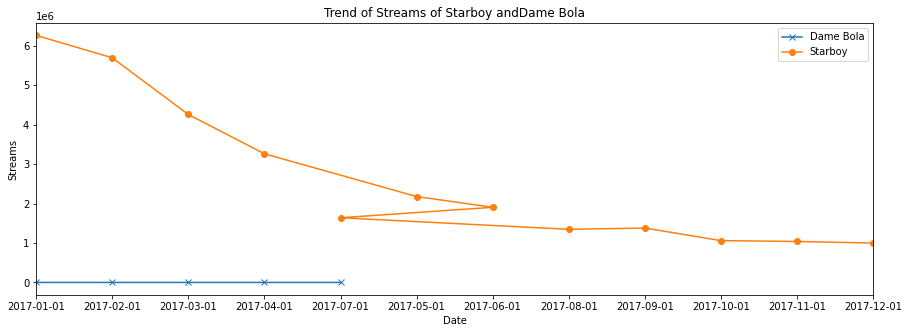

In [225]:
# TODO: Plot a line chart


max_streams=rankings_df[rankings_df["Date"]=="2017-01-01"]
max_streams=max_streams.sort_values(by="Streams",ascending=False)
max_streams=max_streams.reset_index()
max_streams_id=max_streams["ID"][0]
max_streams_s=max_streams["Track Name"][0]

min_streams=rankings_df[rankings_df["Date"]=="2017-01-01"]
min_streams=min_streams.sort_values(by=["Streams"],ascending=True)
min_streams=min_streams.reset_index()
min_streams_id=min_streams["ID"][0]
min_streams_s=min_streams["Track Name"][0]


max_streams_song=rankings_df[rankings_df["ID"]==max_streams_id]

max_streams_song=max_streams_song[max_streams_song["Date"].astype(str).str.contains("2017-01-01|2017-02-01|2017-03-01|2017-04-01|2017-05-01|2017-06-01|2017-07-01|2017-08-01|2017-09-01|2017-10-01|2017-11-01|2017-12-01")]
max_streams_song=max_streams_song.groupby("Date")["Streams"].sum()
max_streams_song=max_streams_song.reset_index()

min_streams_song=rankings_df[rankings_df["ID"]==min_streams_id]

min_streams_song=min_streams_song[min_streams_song["Date"].astype(str).str.contains("2017-01-01|2017-02-01|2017-03-01|2017-04-01|2017-05-01|2017-06-01|2017-07-01|2017-08-01|2017-09-01|2017-10-01|2017-11-01|2017-12-01")]
min_streams_song=min_streams_song.groupby("Date")["Streams"].sum()
min_streams_song=min_streams_song.reset_index()

plt.figure(figsize=(15,5))
plt.plot(min_streams_song["Date"],min_streams_song["Streams"],marker="x",label=min_streams_s)
plt.plot(max_streams_song["Date"],max_streams_song["Streams"],marker="o",label=max_streams_s)
plt.xlim("2017-01-01","2017-12-01")
plt.xlabel("Date")
plt.ylabel("Streams")
plt.title("Trend of Streams of "+max_streams_s+" and"+min_streams_s)
plt.legend([min_streams_s,max_streams_s])
plt.show()




## Part 4: Working with Text Data [14 points]

Now, let's switch gears and try to text-based analysis. Textual data is complex, but can also be used to generate extremely interpretable results, making it both valuable and interesting. 

Throughout this section, we will attempt to answer the following question:

**According to the `songs_df` dataframe, what do the reviews for the Top Tracks of 2017 look like?**


###4.1 Tokenizing the text

We are going to split the contents of in the Reviews column into a list of words. We will use the **nltk** library, which contains an extensive set of tools for text processing. Now, this homework would be interminably long if we went into all the details of nltk. Thus, we are only going to use the following components of the library:
- `nltk.word_tokenize()`: a function used to tokenize text
- `nltk.corpus.stopwords`: a list of commonly used words such as "a", "an","in" that are often ignored in text analysis

Note that for this question, we didn't have to clean the text data first as our original dataset was well-formatted. However, in practice, we would typically clean the text first using regular expressions (regex). Keep this in mind as you work on the project later on in the semester.

**TODO:** Perform the following tasks:
- Use **nltk.corpus.stopwords** to create a set containing the most common English stopwords.
- Implement the function **tokenized_content(content)**, which takes in a string and does the following:
1. Tokenize the text
2. Keep tokens that only contain alphabetic characters (i.e. tokens with no punctuation)
3. Convert each token to lowercase
4. Remove stopwords (commonly used words such as "a", "an", "in")


In [226]:
import nltk
nltk.__version__

'3.7'

In [227]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [228]:
# TODO: tokenize and flatten
def tokenize_content(content):
  t=nltk.tokenize.word_tokenize(content)
  t=[token.lower() for token in t if token.isalpha()]
  t=[token for token in t if token not in stopwords]
  return t
  

**TODO**: Also perform the following tasks: 
- Extract the `reviews` column of `songs_df` as a list called `reviews`. 
- Apply your `tokenize_content()` function to each item in the list `reviews`. Call the resultant list `top_tokens_list`. 
- Flatten the list `top_tokens_list`, and call the resultant list **top_tokens**. The autograder will be examining the contents of this list.

In [229]:
songs_df

,id,name,artists,duration_ms,reviews,duration_min
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,233713,vocal has a nice warm quality.,3.895217
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,228827,Very European feeling. I like that the singer ...,3.813783
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,228200,Unique and quirky. Arrangement was good and ni...,3.803333
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,247160,Tastefully put together song. Good instrumenta...,4.119333
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,288600,Your voice is awesome,4.810000
...,...,...,...,...,...,...
95,1PSBzsahR2AKwLJgx8ehB,Bad Things (with Camila Cabello),Machine Gun Kelly,239293,Good strong voice,3.988217
96,0QsvXIfqM0zZoerQfsI9l,Don't Let Me Down,The Chainsmokers,208053,good movie sound track,3.467550
97,7mldq42yDuxiUNn08nvzH,Body Like A Back Road,Sam Hunt,165387,Good melody. A little different,2.756450
98,7i2DJ88J7jQ8K7zqFX2fW,Now Or Never,Halsey,214802,Good lyrics...,3.580033


In [230]:
# TODO: tokenize and flatten
top_tokens=[]
top_tokens_list=[]
reviews=np.array(songs_df["reviews"].values)
for word in reviews:
  top_tokens.append(tokenize_content(word))
def token_flattening_function(T):
  flat=[]
  for w in T:
    if isinstance(w,list):
      flat.extend(token_flattening_function(w))
    else:
      flat.append(w)
  return flat

top_tokens=token_flattening_function(top_tokens)



In [231]:
# 2 point
grader.grade(test_case_id = 'test_top_tokens', answer = len(top_tokens))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 4.2 Most Frequent Words
**TODO**: Now, find the 20 most common words in the list `top_tokens`. Save the result as a list of `(word, count)` tuples, in descending order of `count`.

**Hint**: For this question, you can use `Counter` from the Python `collections` library: https://docs.python.org/2/library/collections.html#counter-objects

In [232]:
from collections import Counter
freq=Counter(top_tokens)
top_most_common=freq.most_common(20)
top_most_common


[('good', 35),
 ('nice', 31),
 ('like', 26),
 ('song', 21),
 ('voice', 18),
 ('great', 14),
 ('really', 13),
 ('unique', 12),
 ('lyrics', 12),
 ('sound', 11),
 ('love', 9),
 ('interesting', 9),
 ('vocal', 8),
 ('tune', 8),
 ('vocals', 8),
 ('instrumentation', 7),
 ('melody', 7),
 ('music', 7),
 ('feel', 6),
 ('overall', 6)]

In [233]:
# 2 points
grader.grade(test_case_id = 'test_top_most_common', answer = top_most_common)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 4.3 Word Clouds [10 points]

Before we move on from this dataset, let's visualize our results using a word cloud.

**TODO**: Create a word cloud containing all the words in the list `top_tokens` (created in question 4.1). [The WordCloud documentation](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html) contains instructions on how to do this. 

*Please make sure your wordcloud has a **white** background.*

We will be going through your notebooks and **manually grading** your word cloud. This is worth 10 points. 

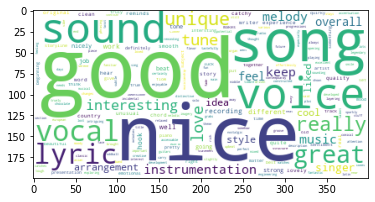

In [234]:
# TODO: make a word cloud for top tokens (MANUALLY GRADED)
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordCloud=WordCloud(background_color="white").generate(" ".join(top_tokens))
plt.imshow(wordCloud)

# HW Submission

<br>
<center><img src = "https://memegenerator.net/img/instances/73124265/good-job.jpg" width= "500" align ="center"/></center>
<br>

Congratulations on finishing this homework! The good news is that similar to HW1, you basically know your score when you submit to Gradescope. 
However, this time, we will be manually grading your lineplots and wordclouds, so the autograder score is not final! Remember that we will also be checking for plagiarism, so please make sure to cite your sources (if any) by commenting the urls / links you looked at.

Before you submit on Gradescope (you must submit your notebook to receive credit):

1.   Please rerun your notebook on Colab by clicking "Restart and Run-All", and make sure there is nothing wrong with your notebook.
2.   **Double check that you have the correct PennID (all numbers) saved in the autograder**. 
3. Make sure you've run all the PennGrader cells and have received a score.
4. Go to the "File" tab at the top left, and click "Download .ipynb" + "Download .py". Please name the `.ipynb` and `.py` files **"homework2.ipynb"** and **"homework2.py"** respectively. Then, upload both the `.py` and `.ipynb` files to Gradescope. 

###Be sure to name your files correctly!!!

**Please let the course staff know ASAP if you have any issues submitting.**